In [2]:
!pip install pyswarms

     |████████████████████████████████| 102kB 5.0MB/s 


Below is the code for Particle Swarm optimization of a Schaffer 2 function. It produces a 3D animation presented as HTML5 video. 

2020-01-22 15:27:59,949 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=5.21e-12
2020-01-22 15:28:00,263 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.208056208516609e-12, best pos: [ 4.11213890e-05 -5.93053805e-05]
2020-01-22 15:28:00,266 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=4.44e-16
2020-01-22 15:28:00,568 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.440892098500626e-16, best pos: [-4.49322536e-07 -4.10264311e-07]
2020-01-22 15:28:01,807 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2020-01-22 15:28:01,809 - matplotlib.animation - INFO - MovieWriter.run: running command: ['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '720x57

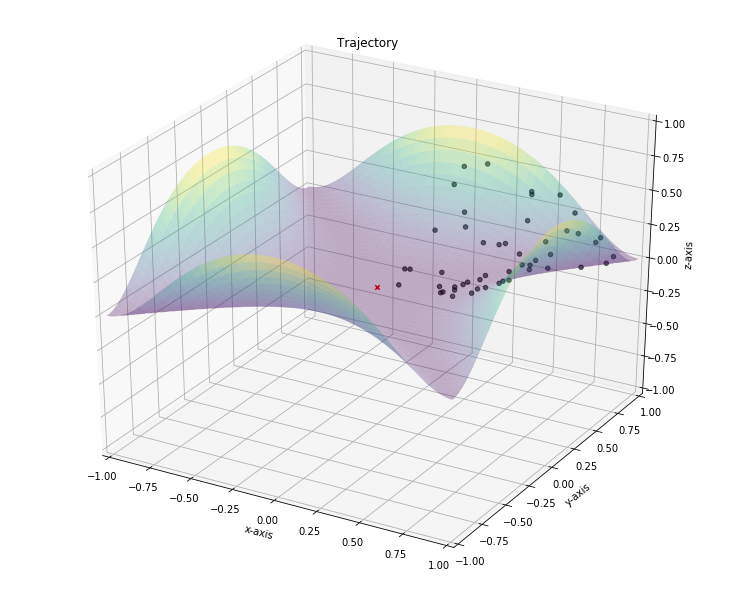

In [11]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx 
from pyswarms.utils.plotters.formatters import Mesher, Designer
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
import matplotlib.pyplot as plt
from IPython.display import HTML

# This code uses pyswarms -library for the PSO, the library can be 
# installed as pyswarms or found here:
# https://github.com/ljvmiranda921/pyswarms

#Hyperparameters (cognitive, social and inertia weight) 
opt = {"c1":0.5, "c2":0.3, "w":0.9}

#The optimizer for sphere function:
optimizer = ps.single.GlobalBestPSO(n_particles=50,dimensions=2,options=opt)
optimizer.optimize(fx.schaffer2, iters=100)
best_cost, best_pos = optimizer.optimize(fx.schaffer2, iters=100)

#history of particle positions for animation
hist = optimizer.pos_history

#This can plot the cost history:
#plot_cost_history(optimizer.cost_history)

#Mesh for the plot:
m = Mesher(func=fx.schaffer2, limits=[(-1,1),(-1,1)])

#This can be used for designing the animation 
#but the defaults are enough for this task/the values are right as defaults
#d = Designer(limits=[(-1,1),(-1,1),(-0.1,1)],
 #           label=["x-axis","y-axis","z-azis"])


#3D version for fun:
pos_his_3D = m.compute_history_3d(hist)
anim3D = plot_surface(pos_history=pos_his_3D,
    mesher=m, mark=(0,0,0))

#Makes the animation a HTML5 video for playing in Jupyter Notebooks!
HTML(anim3D.to_html5_video())
plt.rcParams['animation.html'] = 'html5'
anim3D
#plt.show()

